In [1]:
import pandas as pd

from code.parser.parse import Parser
import matplotlib.pyplot as plt
from code.wiener_kolmogorov.wiener_kolmogorov import WienerKolmogorov as WK
from code.detector.detector import  Detector
import numpy as np

pre1 = Parser.read('../../runs/1/pre.txt')
abs1 = Parser.read('../../runs/1/abs.txt')
pre2 = Parser.read('../../runs/2/pre.txt')
abs2 = Parser.read('../../runs/2/abs.txt')

In [2]:
pre1 = pd.concat([pre1, abs1], ignore_index=True)
abs1 = pd.concat([abs1, abs1], ignore_index=True)
pre2 = pd.concat([pre2, abs2], ignore_index=True)
abs2 = pd.concat([abs2, abs2], ignore_index=True)

In [3]:
def filter_out(pres, abss):
    filters = []
    for abs in abss:
        filter = WK()
        filter.fit(abs["rssi"].to_numpy())
        filters.append(filter)
    outs = []
    print(filters)
    for i, pre in enumerate(pres):
        out = filters[i].transform(pre["rssi"].to_numpy())
        outs.append(out)
    return outs, filters

In [4]:
outs, filters = filter_out([pre1, pre2], [abs1, abs2])

[<code.wiener_kolmogorov.wiener_kolmogorov.WienerKolmogorov object at 0x7f13a00f86d0>, <code.wiener_kolmogorov.wiener_kolmogorov.WienerKolmogorov object at 0x7f13a00f8eb0>]


In [5]:
ticks = list(range(0, 2 * 200 + 1, 2 * 25))

In [6]:
ticks

[0, 50, 100, 150, 200, 250, 300, 350, 400]

In [7]:
def subplot(pres, outs, titles):
    legend = ["RSSI в жилой комнате", "RSSI в офисе"]
    fig = plt.figure(figsize=(16, 12))
    n = len(pres)
    axs = []
    k = 1
    # for pre in pres:
    #     for out in outs:
    #         axs.append(fig.add_subplot(n, n, k))
    #         k += 1
    # for pre, out in pres, outs:
    for i, (pre, out) in enumerate(zip(pres, outs)):
        axs.append(fig.add_subplot(n, 1, k))
        axs[k - 1].plot(pre.rssi.to_numpy(), label=legend[0], linestyle="solid")
        axs[k-1].set_xticks(ticks)
        axs[k-1].set_xlabel("Время, с")
        axs[k-1].set_ylabel("RSSI, dBm")
        axs[k - 1].plot(out, label=legend[1], linestyle="dashed")
        # axs[k - 1].legend()
        axs[k - 1].set(title=titles[k-1])
        k += 1
        # axs.append(fig.add_subplot(n, 2, k))
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'lower center')
    return fig

<ipython-input-8-75679ebf69d4>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


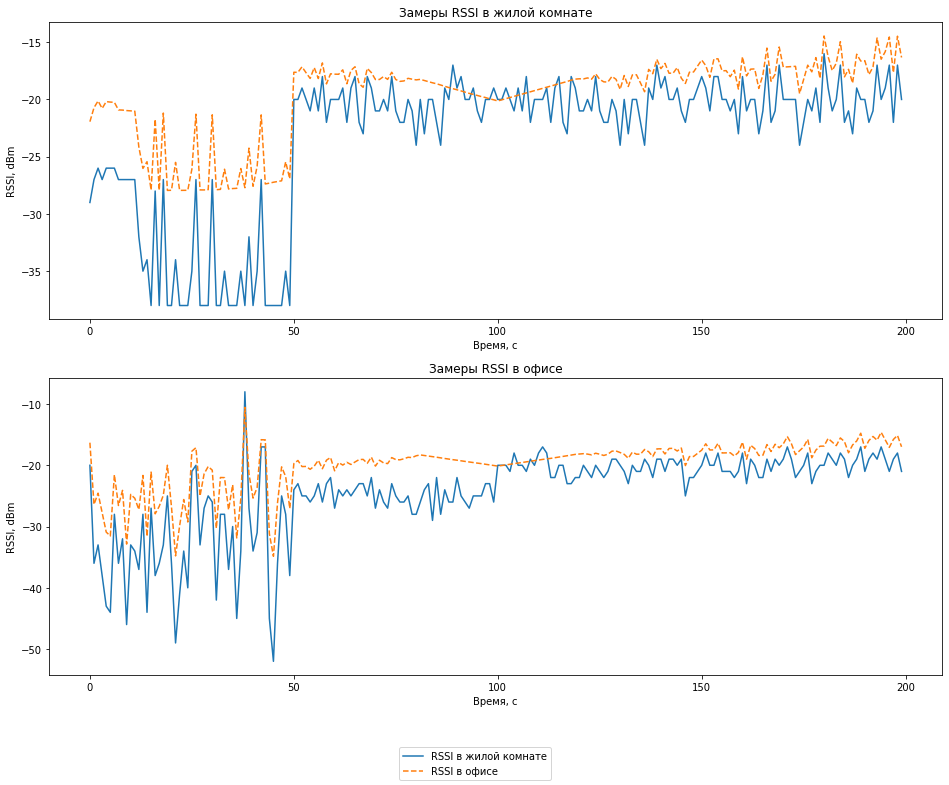

In [8]:
fig = subplot([pre1, pre2], outs, titles=["Замеры RSSI в жилой комнате", "Замеры RSSI в офисе"])
fig.show()
fig.savefig("shibaev_1.png")